# Data cleaning and transforming

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine

In [43]:
df = pd.read_csv(r'C:\Users\arailym\PycharmProjects\database analysis\data\economic_indicators_dataset_2010_2023.csv')
df.head()

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03


In [44]:
df.shape

(500, 7)

In [45]:
df.dtypes

Date                      object
Country                   object
Inflation Rate (%)       float64
GDP Growth Rate (%)      float64
Unemployment Rate (%)    float64
Interest Rate (%)        float64
Stock Index Value        float64
dtype: object

In [46]:
df['Date'] = pd.to_datetime(df['Date'])
df['Country'] = df['Country'].astype('category')

In [61]:
df.isnull().sum()

Date                     0
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
df.info
df.describe

<bound method NDFrame.describe of           Date    Country  Inflation Rate (%)  GDP Growth Rate (%)  \
0   2010-01-31     Brazil                1.23                 0.69   
1   2010-01-31     France                6.76                 2.59   
2   2010-01-31        USA                7.46                 4.84   
3   2010-02-28     Brazil                5.43                 0.31   
4   2010-02-28     Canada                0.69                -0.52   
..         ...        ...                 ...                  ...   
495 2023-08-31      Japan                5.71                -3.85   
496 2023-08-31         UK                4.82                 8.95   
497 2023-09-30        USA                7.32                 0.61   
498 2023-10-31    Germany                8.04                -2.23   
499 2023-11-30  Australia                9.23                 6.16   

     Unemployment Rate (%)  Interest Rate (%)  Stock Index Value  
0                    10.48               7.71           21

In [50]:
df['Country'].unique()

['Brazil', 'France', 'USA', 'Canada', 'Japan', 'Germany', 'China', 'UK', 'India', 'Australia']
Categories (10, object): ['Australia', 'Brazil', 'Canada', 'China', ..., 'India', 'Japan', 'UK', 'USA']

In [51]:
df.to_csv('indicators.csv', index=False)

# Data visualisation


C:\Users\arailym\AppData\Local\Temp\ipykernel_1836\468934945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['Date'] = pd.to_datetime(usa_data['Date'])


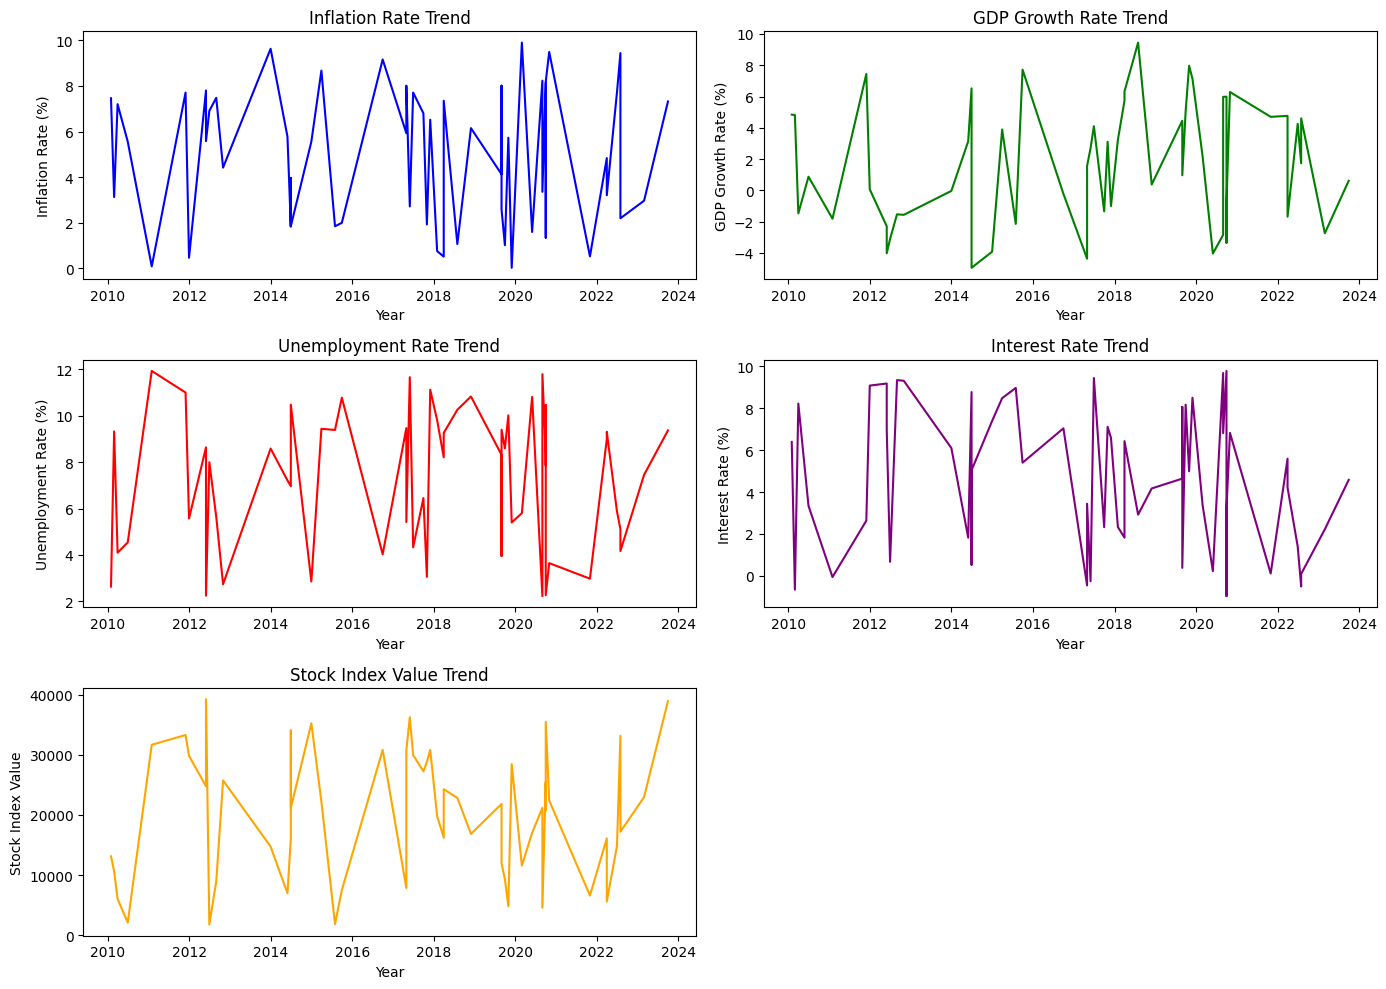

In [52]:
# Filter data for USA only
usa_data = df[df['Country'] == 'USA']

# Convert the 'Date' column to datetime format
usa_data['Date'] = pd.to_datetime(usa_data['Date'])

# Create subplots for visualizing trends
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Inflation Rate
axs[0, 0].plot(usa_data['Date'], usa_data['Inflation Rate (%)'], label='Inflation Rate (%)', color='blue')
axs[0, 0].set_title('Inflation Rate Trend')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Inflation Rate (%)')

# GDP Growth Rate
axs[0, 1].plot(usa_data['Date'], usa_data['GDP Growth Rate (%)'], label='GDP Growth Rate (%)', color='green')
axs[0, 1].set_title('GDP Growth Rate Trend')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('GDP Growth Rate (%)')

# Unemployment Rate
axs[1, 0].plot(usa_data['Date'], usa_data['Unemployment Rate (%)'], label='Unemployment Rate (%)', color='red')
axs[1, 0].set_title('Unemployment Rate Trend')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Unemployment Rate (%)')

# Interest Rate
axs[1, 1].plot(usa_data['Date'], usa_data['Interest Rate (%)'], label='Interest Rate (%)', color='purple')
axs[1, 1].set_title('Interest Rate Trend')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Interest Rate (%)')

# Stock Index Value
axs[2, 0].plot(usa_data['Date'], usa_data['Stock Index Value'], label='Stock Index Value', color='orange')
axs[2, 0].set_title('Stock Index Value Trend')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Stock Index Value')

# Hide the empty subplot
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\arailym\AppData\Local\Temp\ipykernel_1836\4293133923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['Date'] = pd.to_datetime(usa_data['Date'])


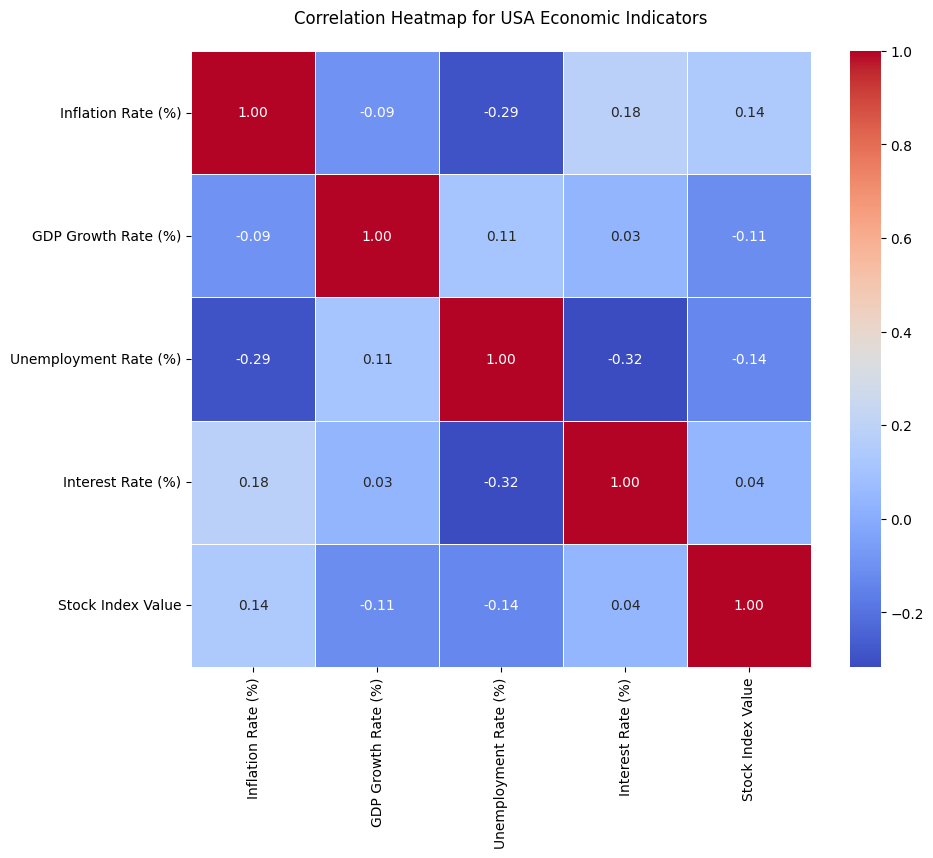

In [53]:
# Filter data for USA only
usa_data = df[df['Country'] == 'USA']

# Convert the 'Date' column to datetime format
usa_data['Date'] = pd.to_datetime(usa_data['Date'])

# Calculate the correlation matrix
usa_data_corr = usa_data[['Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)', 
                          'Interest Rate (%)', 'Stock Index Value']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(usa_data_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for USA Economic Indicators', pad=20)
plt.show()

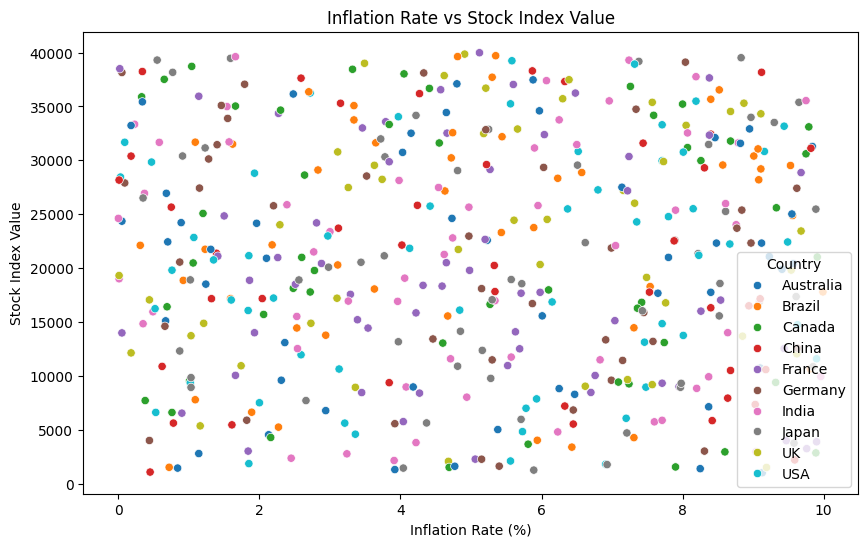

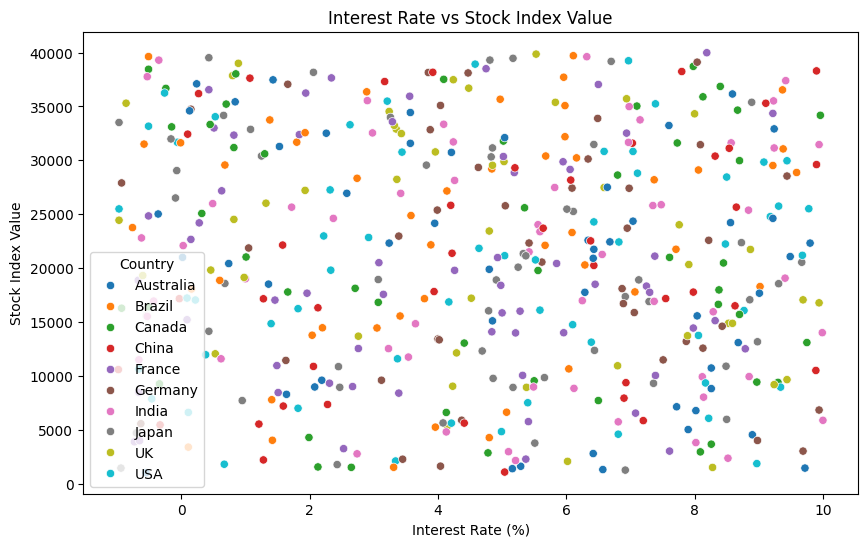

In [54]:
# EDA: Visualizing relationships between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation Rate (%)', y='Stock Index Value', hue='Country', data=df)
plt.title('Inflation Rate vs Stock Index Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Interest Rate (%)', y='Stock Index Value', hue='Country', data=df)
plt.title('Interest Rate vs Stock Index Value')
plt.show()

In [59]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Your transformed DataFrame is assumed to be named 'usa_df'
# Database credentials
user = 'root'
password = 'Aruzhan10@'
host = 'localhost'
port = '3306'
database = 'macroec'
table_name = 'indicators'

# Create connection string for MySQL database
password_encoded = quote_plus(password)
connection_string = f'mysql+mysqlconnector://{user}:{password_encoded}@{host}:{port}/{database}'

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

# Write DataFrame to MySQL table
df.to_sql(table_name, con=engine, if_exists='replace', index=False)

print(f"Data successfully exported to MySQL database '{database}' in table '{table_name}'")


Data successfully exported to MySQL database 'macroec' in table 'indicators'
